VENUGOPAL KILAARI MUNASWAMY-101164641

SRINIVASA ADITYA PREETHAM NIDADAVOLU-101177832

Nandakumar Vuppalapati-101179916

Shiva Shanth Reddy Nalla-101181446

Anantha Reddy Pingili-101178565

Agasya Sandilya Devarasetty-101176016

Ashok Sravan Gajjala-101181052

Mahesh Babu Akula-101176611

Maharshi Devarasetty -101139650

Nishyanth varun reddy Somagattu -101177053

# Data Exploration and Preparation 

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Convert to DataFrame for easier manipulation
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

In [4]:
# Check for missing values
print("Missing values:\n", iris_df.isnull().sum())

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM Implementation

In [6]:
# SVM Classifier with default kernel (RBF)
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [7]:
# Predictions
y_pred = svm_classifier.predict(X_test)

# Evaluation
print("SVM with RBF Kernel:")
print(classification_report(y_test, y_pred))

SVM with RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



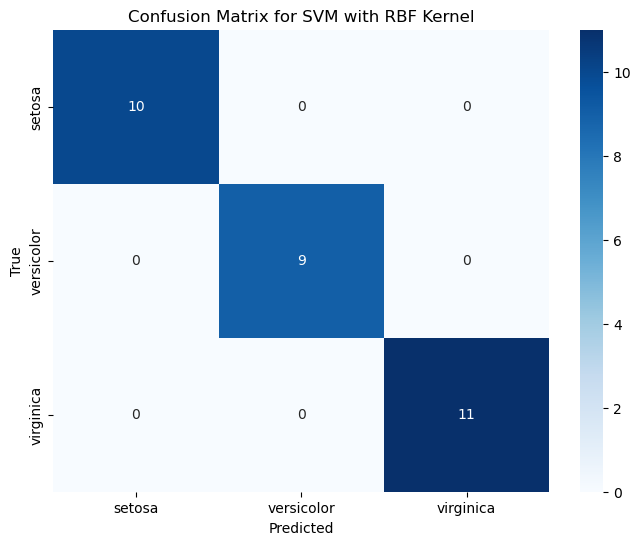

In [8]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names
class_names = iris.target_names

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM with RBF Kernel')
plt.show()

In [9]:
# Print classification report
print("Classification Report for SVM with RBF Kernel:")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report for SVM with RBF Kernel:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



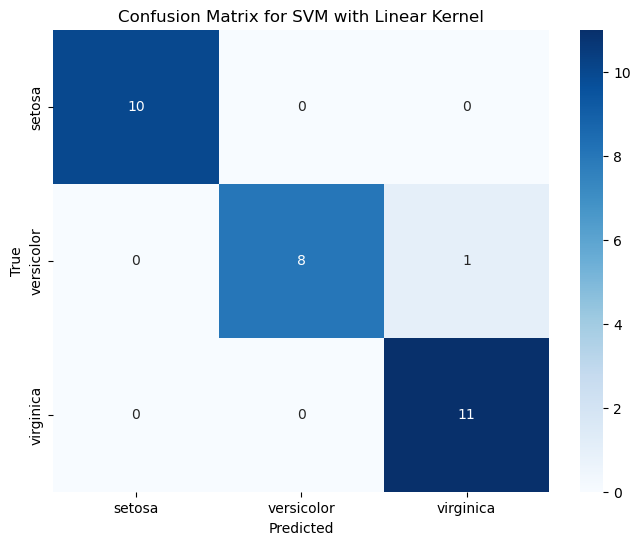


SVM with linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



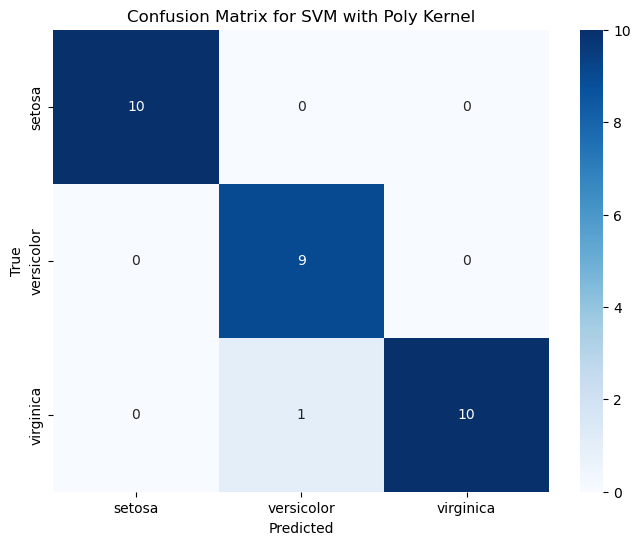


SVM with poly Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



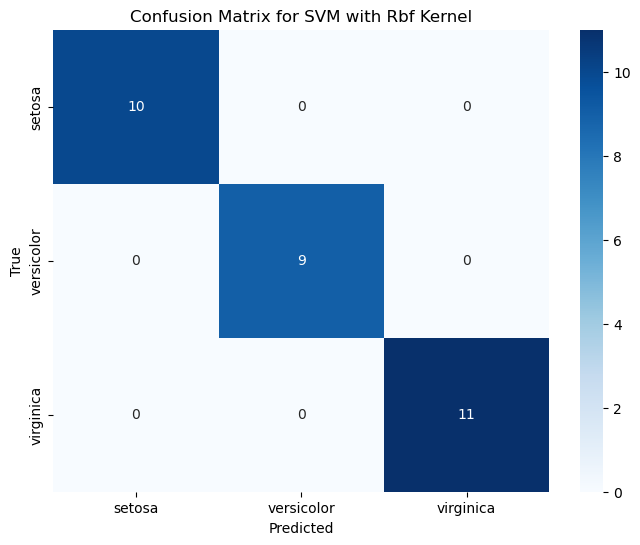


SVM with rbf Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



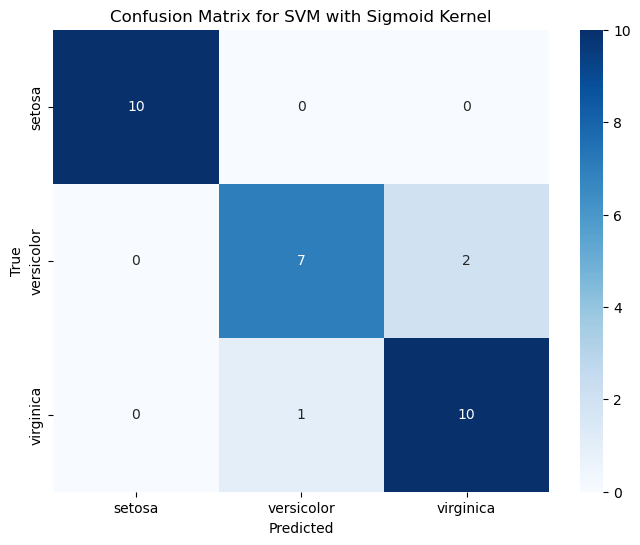


SVM with sigmoid Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [10]:
# Experimenting with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_classifier = SVC(kernel=kernel, random_state=42)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Define class names
    class_names = iris.target_names

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for SVM with {kernel.capitalize()} Kernel')
    plt.show()
    print(f"\nSVM with {kernel} Kernel:")
    print(classification_report(y_test, y_pred))

# K-fold Cross-Validation

In [11]:
# Define KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(svm_classifier, X_scaled, y, cv=kfold)

# Print mean accuracy
print("Mean Accuracy from Cross Validation:", np.mean(scores))

Mean Accuracy from Cross Validation: 0.9133333333333333
